<h1 style="text-align: center;">ENCS5341 Machine Learning and Data Science</h1>
<h2 style="text-align: center;">Assignment #1</h2>
<h3 style="text-align: center;">Name: Mohammed Owda</h3> 
<h3 style="text-align: center;">ID: 1200089</h3> 

In [13]:
# Import nessecarry libraries needed for the Assignment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Part 1: 
### Read the dataset and examine how many features and examples does it have?
In this part, I input the path of the file and check if it exists, then I loaded the file as a pandas dataframe. And finally I found the number of feature (columns) and examples (rows) in the data set

In [14]:
path = 'cars.csv' # The path of the csv file
# Check if the file path exists and exit if it doesn't
try:
    with open(path) as f:
        pass
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit(1)
    
# Load the dataset into a pandas dataframe
cars_data = pd.read_csv(path)

# Examine how many features and examples
num_examples = cars_data.shape[0]
num_features = cars_data.shape[1]

print("Number of features: ", num_features)
print("Number of examples: ", num_examples)


Number of features:  8
Number of examples:  398


As shown in the output, the number of `feature` is 8, and the number of `examples` is 398.
This results is correctly corresponds with what really in the csv file.

## Part 2:
### Are there features with missing values? How many missing values are there in each one?
In this part, I use isnull() function which is return a dataframe same as the cars_data but it replace all null element with True and false otherwise. Then, i use .sum() which find the sum of the 'True' values for each column. Then, I filterd the columns that doesn't have a missing value to display only ones that have missing values. This information will help in the data preprocessing later.

In [15]:
# Check for missing values in each feature
temp = cars_data.isnull().sum()
# filter the columns columns that doesn't have missing values
missing_values = temp[temp > 0]

# Check if there is no missing value
if missing_values.empty:
    print("No, there are no missing values in the dataset.")
else:
    print("Yes, there are missing values in the following features:")
    print(missing_values.to_string())

Yes, there are missing values in the following features:
horsepower    6
origin        2


## Part 3: 
### Fill the missing values in each feature using a proper imputation method. 
In this part, I fill the missing values for numeric columns with the median and the non-numeric columns with the mode since we can't find the median or mean of a non-numeric values. Then I check if there is any missing values remain after filling. The median is often preferred over the mean in such cases since it is less affected by outliers.

In [16]:
# Looping on each column and check if its values numeric or not
for column in cars_data.columns:
    if pd.api.types.is_numeric_dtype(cars_data[column]):
        # Filling missing values for numeric columns with median
        median_value = cars_data[column].median()
        cars_data[column].fillna(median_value, inplace=True)
    else:
        # Filling missing values for non-numeric column 'origin' with mode
        mode_value = cars_data[column].mode()[0]
        cars_data[column].fillna(mode_value, inplace=True)

# Check if any missing values remain
print("Number of missing values after filling:")
print(cars_data.isnull().sum().to_string())

Number of missing values after filling:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0


## Part 4:
### Which country produces cars with better fuel economy?
In this part, I found the best fuel economy country by finding the mean fuel economy ('mpg') for each group, then identify the country of origin with the highest mean.
Also, I create a boxplot using Seaborn library to visually represent the fuel economy distribution ('mpg') for each country of origin.

Country with the best fuel economy:  Asia


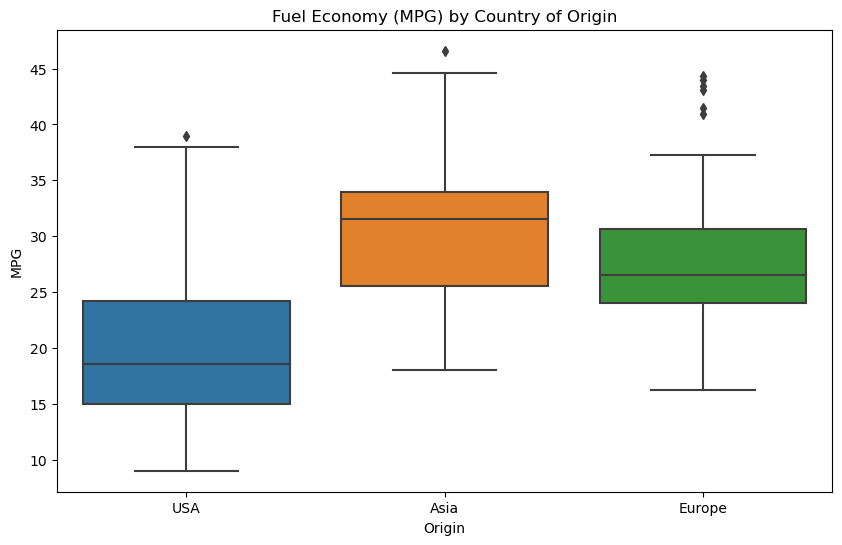

In [17]:
best_fuel_economy_country = cars_data.groupby('origin')['mpg'].mean().idxmax()
print("Country with the best fuel economy: ", best_fuel_economy_country)

plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=cars_data)

plt.title('Fuel Economy (MPG) by Country of Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()

This figure consist of 4 main parts:
- **Box**: Represents the interquartile range of the data. 
- **Line inside the box**: Represents the median of the data.
- **Whiskers**: Indicate the data range within a certain distance from the quartiles.
- **Individual points (outliers)**: Represent data points beyond the whiskers, which may be considered unusual or extreme.<br> 

As shown in the figure, Asia has the highest median, less outliers, and almost similar interquartile range size of distribution to others, so Asia has better average fuel economy.  

## Part 5: 
### Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? 
In this part, I plot the histogram for'acceleration', 'horsepower', and 'mpg' using seaborn and matplotlib library

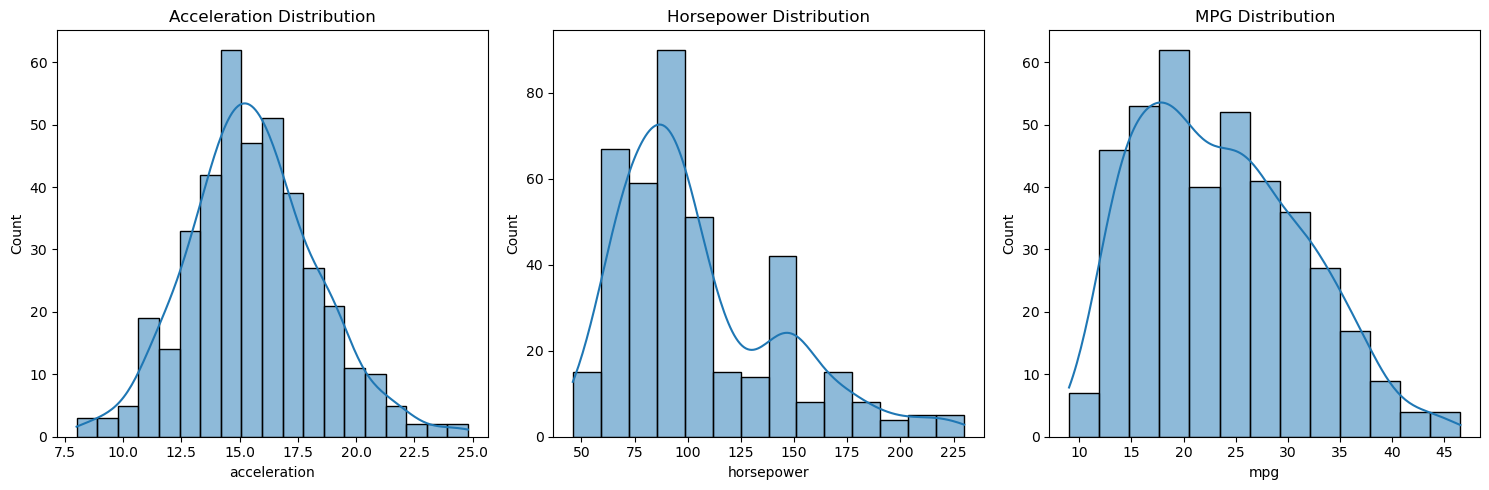

In [18]:
# Plotting histograms for 'acceleration', 'horsepower', and 'mpg' to compare their distributions
plt.figure(figsize=(15, 5))

# Histogram for 'acceleration'
plt.subplot(1, 3, 1)
sns.histplot(cars_data['acceleration'], kde=True)
plt.title('Acceleration Distribution')

# Histogram for 'horsepower'
plt.subplot(1, 3, 2)
sns.histplot(cars_data['horsepower'], kde=True)
plt.title('Horsepower Distribution')

# Histogram for 'mpg'
plt.subplot(1, 3, 3)
sns.histplot(cars_data['mpg'], kde=True)
plt.title('MPG Distribution')

plt.tight_layout()
plt.show()

By examining these histograms, We can notice that the feature `acceleration` has a distribution most similar to a Gaussian (normal) distribution, since it is the most symmetric. Whereas, `Horsepower` displays a right-skewed distribution, and `MPG` appears to be slightly right-skewed but less than the horsepower.

## Part 6:
### Support your answer for part 5 by using a quantitative measure
In this part, I used the Pearson's second skewness coefficient to mesure the median skewness of each feature. Values that are near to zero indicate that the feature is symmetric (similar to Gaussian distribution)
The pearson's second skewness coefficient calculated as follow:  
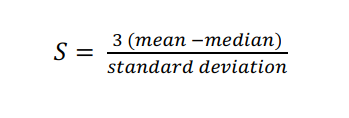

In [19]:
# Function to find the Pearson's second skewness coefficient (median skewness)
def median_skewness(data):
    median = data.median()
    mean = data.mean()
    std_dev = data.std()
    skewness = 3 * (mean - median) / std_dev
    return skewness

# find the median skewness for acceleration, horsepower, and mpg
skewness_of_acceleration = median_skewness(cars_data['acceleration'])
skewness_of_horsepower = median_skewness(cars_data['horsepower'])
skewness_of_mpg = median_skewness(cars_data['mpg'])

print("Skewness of 'acceleration': ", skewness_of_acceleration)
print("Skewness of 'horsepower': ", skewness_of_horsepower)
print("Skewness of 'mpg': ", skewness_of_mpg)


Skewness of 'acceleration':  0.07407338607902728
Skewness of 'horsepower':  0.8479810168283543
Skewness of 'mpg':  0.19750789295764096


Based on the pearson's second skewness coefficient, `acceleration` has a distribution most similar to a Gaussian (normal) distribution, as it exhibits the least skewness among the three features.

## Part 7
### Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?

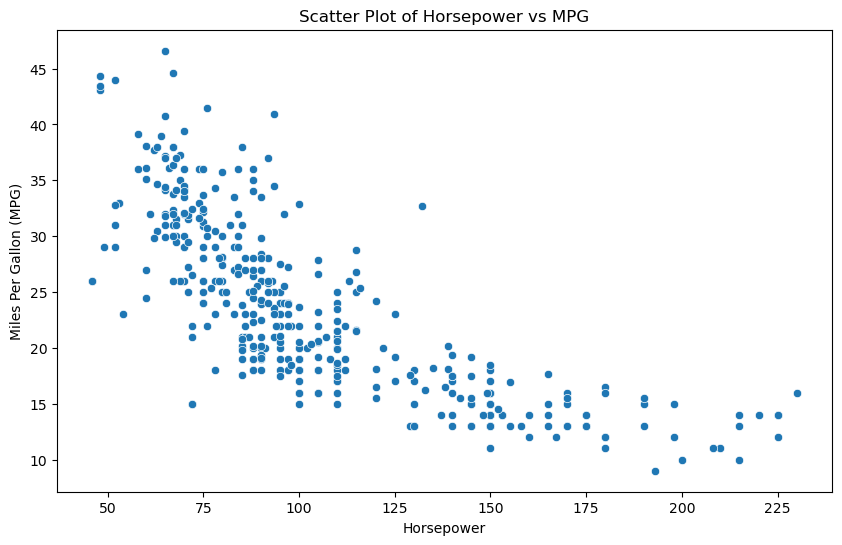

In [20]:
# Creating a scatter plot to show the relationship between 'horsepower' and 'mpg'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=cars_data)

plt.title('Scatter Plot of Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

There appears to be a negative correlation between horsepower and mpg, since when the horsepower increases, the mpg tends to decrease, and vice versa.


## Part 8:
### Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. 
In this part, I add a x0=1 for the intercept, then applied the closed form solution for the linear regression which is as the following:  
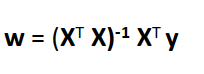

w:  [[40.01131787]
 [-0.1581602 ]]


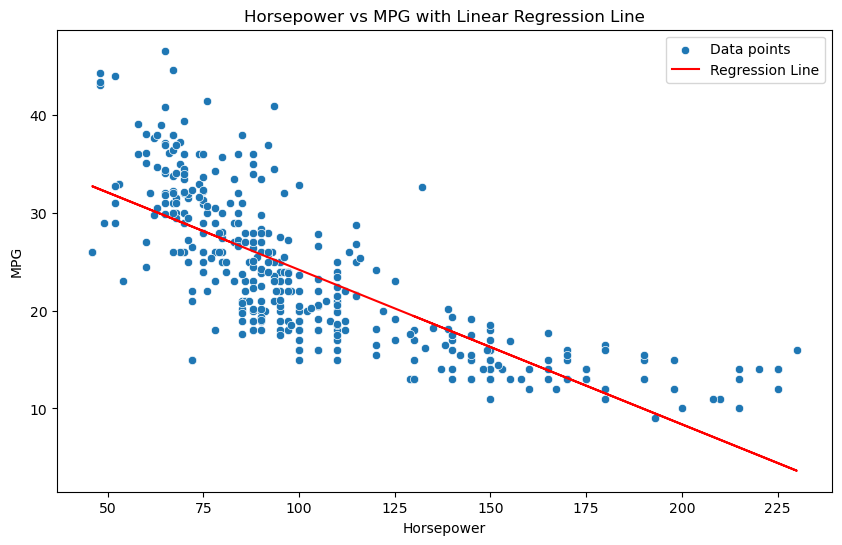

In [21]:

# Preparing the data for linear regression
X = cars_data['horsepower'].values.reshape(-1, 1)  # The Feature
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding x0 = 1 for the intercept
y = cars_data['mpg'].values.reshape(-1, 1)  # Target variable

# Closed form solution of linear regression: (X'X)^-1 X'y
X_transpose = X.T
w = np.linalg.inv(X_transpose.dot(X)) @ X_transpose @ y  # w (parameters)
print("w: ", w)
# Predicting 'mpg' from 'horsepower' using the learned model
y_pred = X @ w

# Plotting the scatter plot and the learned linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=cars_data, label='Data points')
plt.plot(cars_data['horsepower'], y_pred, color='red', label='Regression Line')

plt.title('Horsepower vs MPG with Linear Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

The red line represents the linear model learned from the data, showing the relationship between horsepower and mpg. This line is the best fit found using the closed form solution of linear regression.  
The linear model suggests a negative linear relationship between horsepower and mpg, consistent with the earlier observation in the scatter plot.

## Part 9:
### Repeat part 8 but now learn a quadratic function of the form:  
  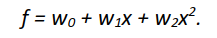

In this part, a quadratic regression model is prepared by generating a range of 'horsepower' values (horsepower_range) and creating a matrix (z_range) for predictions. The matrix z is also created based on the original data X and it contains three columns [1, x, x^2]. Finally, linear regression is performed against z using the closed-form solution to calculate the coefficients.

w_quadratic:  [[ 5.67812082e+01]
 [-4.62563379e-01]
 [ 1.21431773e-03]]


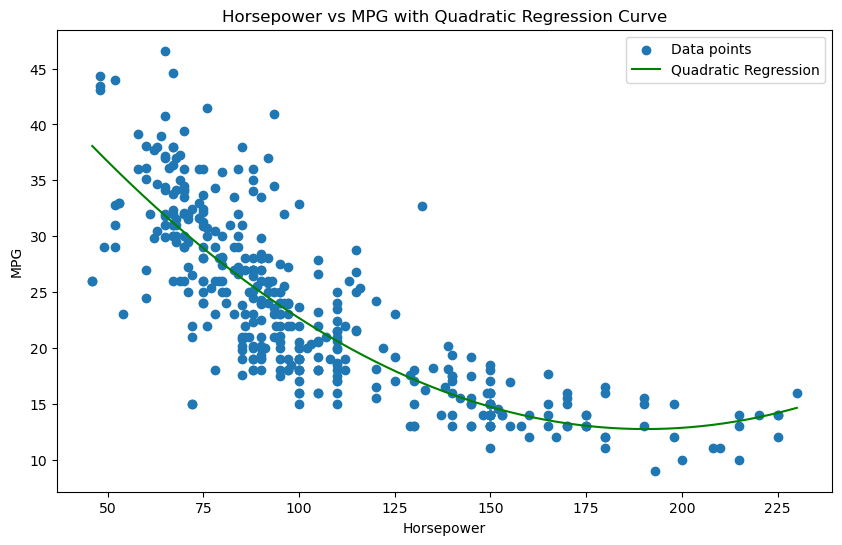

In [22]:
# Generating horsepower values for the quadratic curve
horsepower_range = np.linspace(cars_data['horsepower'].min(), cars_data['horsepower'].max(), 500)
horsepower_range_reshaped = horsepower_range.reshape(-1, 1)
# Creates a matrix for the quadratic model with three columns: [1, horsepower, horsepower^2]
z_range = np.hstack((np.ones(horsepower_range_reshaped.shape), horsepower_range_reshaped, horsepower_range_reshaped ** 2))

# Create z matrix from X matrix for the quadratic model with three columns: [1, horsepower, horsepower^2]
z = np.hstack((np.ones((X.shape[0], 1)), X[:, 1].reshape(-1, 1), (X[:, 1] ** 2).reshape(-1, 1)))

# Calculating w_quad for the quadratic model
zT= z.T
w_quadratic = np.linalg.inv(zT.dot(z)) @ zT @ y
print("w_quadratic: ", w_quadratic)

# Predicting 'mpg' for the generated horsepower range using the quadratic model
ypred_quadratic = z_range @ w_quadratic

# Plotting the scatter plot with the quadratic regression curve
plt.figure(figsize=(10, 6))
plt.scatter(cars_data['horsepower'], cars_data['mpg'], label='Data points')
plt.plot(horsepower_range, ypred_quadratic, color='green', label='Quadratic Regression')

plt.title('Horsepower vs MPG with Quadratic Regression Curve')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


The curve is a nonlinear relationship between horsepower and mpg. This quadratic model provides a more nuanced understanding of how mpg varies with horsepower compared to a simple linear model

## Part 10: 
### Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.
In this part, I applied the gradient descent algorithem with initial parameters w=(0,0)T, and using this update rule: 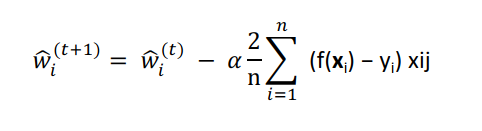
To ensure convergence, I selected a configuration with one million iterations and a learning rate of 0.0001, as it represents a minimal setting for achieving convergence. (Note: this method took about 15 seconds to get the output)  
I also tried an alternative approach where I applied z-score normalization to the data. This led to faster convergence, since I achieved convergence within 1000 iterations while using a learning rate of 0.01. (Note: i comment the code of normalization since it's not required in the assignment)

w after Gradient Descent: [[40.0110212 ]
 [-0.15815769]]


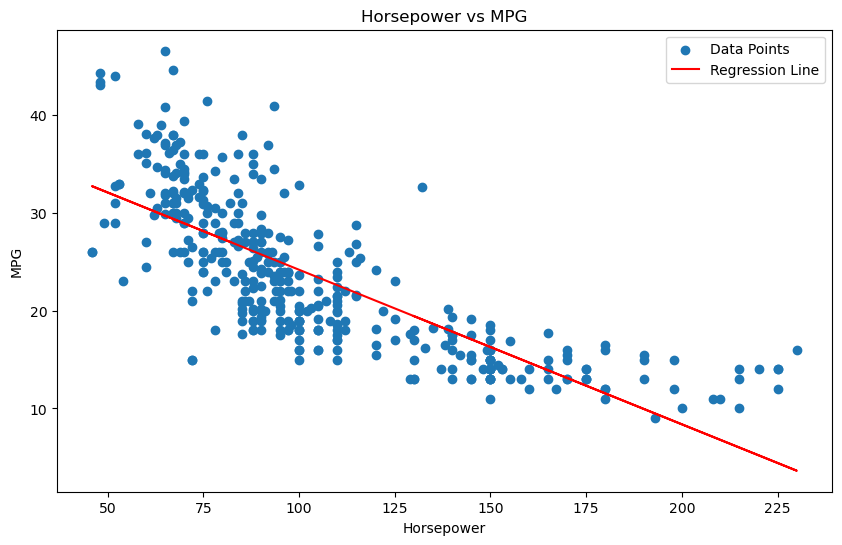

In [23]:
# Function to perform gradient descent
def gradient_descent(X, y, w, learning_rate, num_iterations):
    m = len(y)

    for i in range(num_iterations):
        predictions = X.dot(w)
        w -= (1/m) * learning_rate * X.T.dot(predictions - y)
    return w


# Extracting features and target variable
X = cars_data['horsepower'].values.reshape(-1, 1)
y = cars_data['mpg'].values.reshape(-1, 1)

"""
# Normalize the 'horsepower' feature using z-score normalization
mean_horsepower = np.mean(X)
std_horsepower = np.std(X)
X = (X - mean_horsepower) / std_horsepower
"""

# Add intercept term to feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initializing parameters
w = np.zeros((2, 1))  #  start from random inital parameters w= (0, 0)T
learning_rate = 0.0001  # learning rate
num_iterations = 1000000  # number of iterations


# Performing gradient descent
w = gradient_descent(X, y, w, learning_rate, num_iterations)

# Print the final w values
print("w after Gradient Descent:", w)


# Generate predictions using the learned model
predictions = X.dot(w)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, label='Data Points')  # Original data
plt.plot(X[:, 1], predictions, color='red', label='Regression Line')  # Regression line
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

As shown in the plot, we can notice that both gradient descent and the closed-form solution of linear regression give the same regression line, and that gradient descent has converged effectively to the optimal solution since the linear regreesion is convex (has a single global minimum). 